In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:\
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agactraining/eda_using_basic_data_functions_in_python_dataset1.csv
/kaggle/input/eda-structuring-with-python-dataset2/eda_structuring_with_python_dataset2.csv


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [57]:
df = pd.read_csv('/kaggle/input/agactraining/eda_using_basic_data_functions_in_python_dataset1.csv')
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [58]:
df['date'] = pd.to_datetime(df['date'])

In [60]:
df.shape

(3401012, 3)

In [61]:
# shows dataset after data duplicates are removed
df.drop_duplicates().shape

(3401012, 3)

In [62]:
# sorts by number of strikes in descending order
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


In [63]:
df.center_point_geom.value_counts()

POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: center_point_geom, Length: 170855, dtype: int64

In [64]:
# Identify top 20 locations with the most days of lightning
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


In [65]:
# Create two new columns to find lightning strikes by day of week
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df.head()


,date,number_of_strikes,center_point_geom,week,weekday,quarter
0,2018-01-03,194,POINT(-75 27),1,Wednesday,2018-Q1
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday,2018-Q1
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday,2018-Q1
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday,2018-Q1
4,2018-01-03,92,POINT(-79 28),1,Wednesday,2018-Q1


In [66]:
df[['weekday', 'number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


In [68]:
# defines order of days for the plot
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 

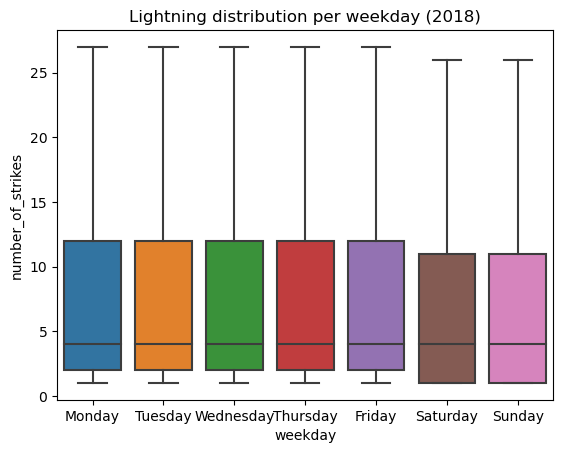

In [69]:
# creates boxplots of strikes counts for each day of week
g = sns.boxplot( data=df,
               x='weekday',
               y='number_of_strikes', 
               order=weekday_order,
               showfliers=False
               );
g.set_title('Lightning distribution per weekday (2018)');

In [70]:
# Import 2016-2017 data
df_2 = pd.read_csv('/kaggle/input/eda-structuring-with-python-dataset2/eda_structuring_with_python_dataset2.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


In [71]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077991 entries, 0 to 7077990
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 162.0+ MB


In [72]:
# Convert date column to datetime to combine the datasets
df_2['date'] = pd.to_datetime(df_2['date'])


In [73]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077991 entries, 0 to 7077990
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 162.0+ MB


In [74]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['week', 'weekday'], axis=1), df_2], ignore_index=True)
'''Dropping the weekday and week'''

union_df.head()


,date,number_of_strikes,center_point_geom,quarter
0,2018-01-03,194,POINT(-75 27),2018-Q1
1,2018-01-03,41,POINT(-78.4 29),2018-Q1
2,2018-01-03,33,POINT(-73.9 27),2018-Q1
3,2018-01-03,38,POINT(-73.8 27),2018-Q1
4,2018-01-03,92,POINT(-79 28),2018-Q1


In [75]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   quarter            object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 319.8+ MB


In [76]:
# Add 5 new columns.
union_df['week'] = df['date'].dt.strftime('%Y-W%V')
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df['quarter'] = union_df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
union_df['year'] = union_df.date.dt.year

union_df.head()

,date,number_of_strikes,center_point_geom,quarter,week,month,month_txt,year
0,2018-01-03,194,POINT(-75 27),2018-Q1,2018-W01,1,January,2018
1,2018-01-03,41,POINT(-78.4 29),2018-Q1,2018-W01,1,January,2018
2,2018-01-03,33,POINT(-73.9 27),2018-Q1,2018-W01,1,January,2018
3,2018-01-03,38,POINT(-73.8 27),2018-Q1,2018-W01,1,January,2018
4,2018-01-03,92,POINT(-79 28),2018-Q1,2018-W01,1,January,2018


In [77]:
union_df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-77.8 18.3),320
1,POINT(-78 18.3),319
2,POINT(-82.5 22.9),311
3,POINT(-77.9 18.3),310
4,POINT(-78 18.4),310
5,POINT(-77.7 18.3),303
6,POINT(-82.2 22.9),302
7,POINT(-84.2 22.3),302
8,POINT(-78 18.2),302
9,POINT(-84.1 22.4),302


In [80]:
# Version 1:Calculates total lightning striks for each month of each year.

lighting_by_month = union_df.groupby(['month_txt', 'year'])['number_of_strikes'].sum().reset_index()
lighting_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


In [81]:
# Version 2 (GoogleData):Calculates total lightning striks for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


In [82]:
# Version 1: Calculate total lightning strikes for each year.
lighting_by_month = union_df.groupby(['year'])['number_of_strikes'].sum().reset_index()
lighting_by_month.head()

,year,number_of_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In [83]:
# Version 2 (GoogleData): Find how many strikes are there each year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


In [84]:
# Version 3 (GoogleData): Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In [85]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229


In [86]:
# Create a new column called "percentage_lightning_per_month"
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()


,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,August,2016,7250442,41582229,17.436396
2,December,2016,316450,41582229,0.761022
3,February,2016,312676,41582229,0.751946
4,January,2016,313595,41582229,0.754156


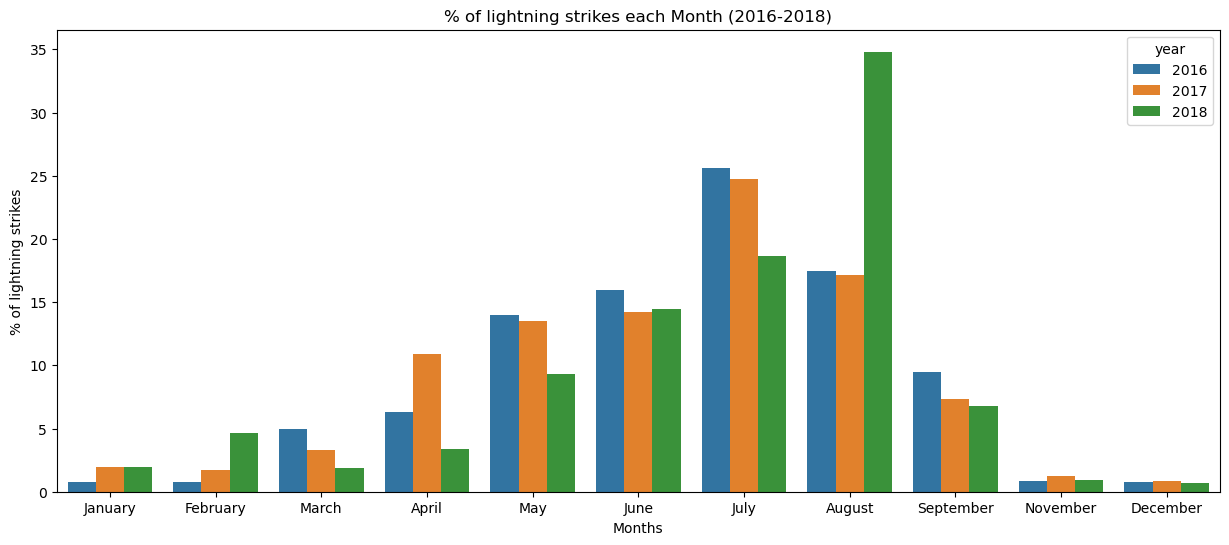

In [87]:
plt.figure(figsize=(15,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']

sns.barplot(
    data = percentage_lightning, 
    x = 'month_txt', 
    y = 'percentage_lightning_per_month', 
    hue = 'year',
    order = month_order);
plt.xlabel("Months");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");